In [3]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"diegomendozaalba","key":"7ac0c11e9d48d0e8655e5eaad9e2ca54"}'}

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

  0% 0.00/58.4k [00:00<?, ?B/s]
100% 58.4k/58.4k [00:00<00:00, 50.8MB/s]


In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

El objetivo de este trabajo es crear un modelo de regresión logística para la predicción de ataques cardíacos en los próximos años utilizando el siguiente conjunto de datos con las siguientes variables:

- Sexo: masculino o femenino. (Nominal)
- Edad: edad del paciente.
- Fumador actual: si el paciente es fumador actual o no. (Nominal)
- Cigarrillos por día: la cantidad de cigarrillos que la persona fumó en promedio en un día.
- BP Meds: si el paciente tomaba o no medicamentos para la presión arterial (Nominal)
- Prevalent Stroke: si el paciente había tenido o no un ictus anteriormente (Nominal)
- Prevalent Hyp: si el paciente era o no hipertenso (Nominal)
- Diabetes: si el paciente tenía o no diabetes (Nominal)
- Tot Chol: nivel de colesterol total (Continuo)
- Sys BP: presión arterial sistólica (Continua)
- Dia BP: presión arterial diastólica (Continua)
- IMC: Índice de Masa Corporal (Continuo)
- Heart Rate: frecuencia cardíaca.
- Glucose: nivel de glucosa (continua)

Variable de predicción (objetivo deseado):
Riesgo de 10 años de enfermedad coronaria CHD (binario: "1", significa "Sí", "0" significa "No")


Recordando que el modelo logistico es descrito por:

In [8]:
import math
from IPython.display import display, Math, Latex
display(Math(r"p=\frac{1}{1+e^{y}}, \ y=\Sigma_{i=1}^{n} a_{i}x_{i}+b: "))

<IPython.core.display.Math object>

In [9]:
data=pd.read_csv("/content/heart-disease-prediction-using-logistic-regression.zip")

In [10]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
data.columns.values

array(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype=object)

In [12]:
for i in data.columns.values:
  print("La columna "+ i + " tiene "+str(pd.isnull(data[i]).values.ravel().sum())+" datos faltantes" )

La columna male tiene 0 datos faltantes
La columna age tiene 0 datos faltantes
La columna education tiene 105 datos faltantes
La columna currentSmoker tiene 0 datos faltantes
La columna cigsPerDay tiene 29 datos faltantes
La columna BPMeds tiene 53 datos faltantes
La columna prevalentStroke tiene 0 datos faltantes
La columna prevalentHyp tiene 0 datos faltantes
La columna diabetes tiene 0 datos faltantes
La columna totChol tiene 50 datos faltantes
La columna sysBP tiene 0 datos faltantes
La columna diaBP tiene 0 datos faltantes
La columna BMI tiene 19 datos faltantes
La columna heartRate tiene 1 datos faltantes
La columna glucose tiene 388 datos faltantes
La columna TenYearCHD tiene 0 datos faltantes


In [13]:
data2=data
for i in data.columns.values:
  data2[i]=data[i].fillna(round(data[i].mean(),2))

for i in data.columns.values:
  print("La columna "+ i + " tiene "+str(pd.isnull(data2[i]).values.ravel().sum())+" datos faltantes" )

La columna male tiene 0 datos faltantes
La columna age tiene 0 datos faltantes
La columna education tiene 0 datos faltantes
La columna currentSmoker tiene 0 datos faltantes
La columna cigsPerDay tiene 0 datos faltantes
La columna BPMeds tiene 0 datos faltantes
La columna prevalentStroke tiene 0 datos faltantes
La columna prevalentHyp tiene 0 datos faltantes
La columna diabetes tiene 0 datos faltantes
La columna totChol tiene 0 datos faltantes
La columna sysBP tiene 0 datos faltantes
La columna diaBP tiene 0 datos faltantes
La columna BMI tiene 0 datos faltantes
La columna heartRate tiene 0 datos faltantes
La columna glucose tiene 0 datos faltantes
La columna TenYearCHD tiene 0 datos faltantes


In [14]:
Y=["TenYearCHD"]
X=[x for x in data.columns.values.tolist() if x not in Y]
data2[Y].head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


In [15]:
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=100000)
rfe = RFE(lr, n_features_to_select=10)
rfe = rfe.fit(data2[X],data2[Y].values.ravel())

In [16]:
Ranking=pd.DataFrame(list(zip(data.columns.values,rfe.ranking_ )))
Ranking

,0,1
0,male,1
1,age,1
2,education,1
3,currentSmoker,1
4,cigsPerDay,1
5,BPMeds,1
6,prevalentStroke,1
7,prevalentHyp,1
8,diabetes,1
9,totChol,4


In [17]:
columnas=["male","age","education","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","sysBP"]

<ipython-input-35-d2ff17609524>:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(legends, labels=["No Ataque", "Ataque"], loc='upper right')


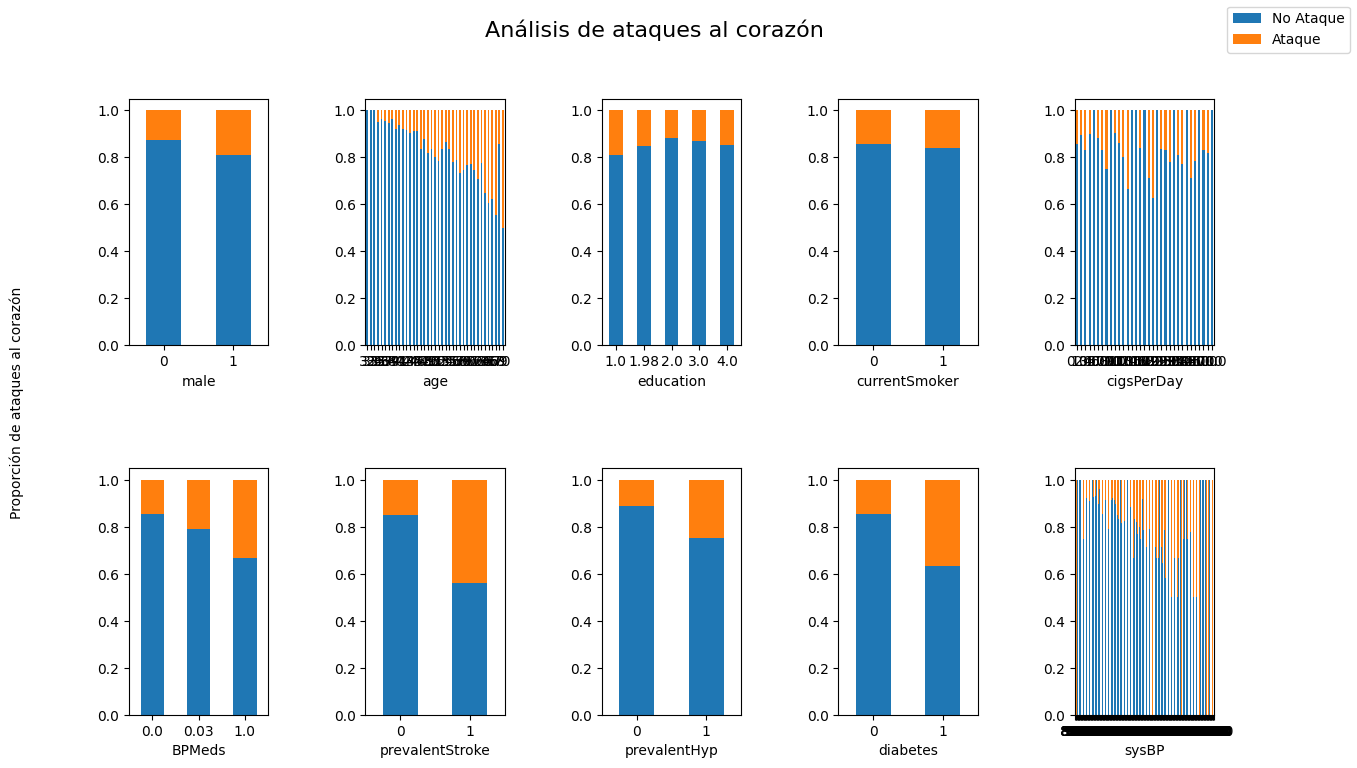

In [35]:
from matplotlib import legend
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))
legens=[]
for col, ax in zip(columnas, axes.flatten()):
    table = pd.crosstab(data2[col], data2.TenYearCHD, normalize='index')
    table.plot(kind="bar", stacked=True, ax=ax, legend=None)

    ax.set(xlabel=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


fig.text(0.04, 0.5, 'Proporción de ataques al corazón', va='center', rotation='vertical')
fig.legend(legends, labels=["No Ataque", "Ataque"], loc='upper right')
fig.suptitle("Análisis de ataques al corazón", fontsize=16)
plt.subplots_adjust(wspace=0.7, hspace=0.5)

plt.show()

<ipython-input-20-30bb24d5707b>:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(legends, labels=["No Ataque", "Ataque"], loc='upper right')


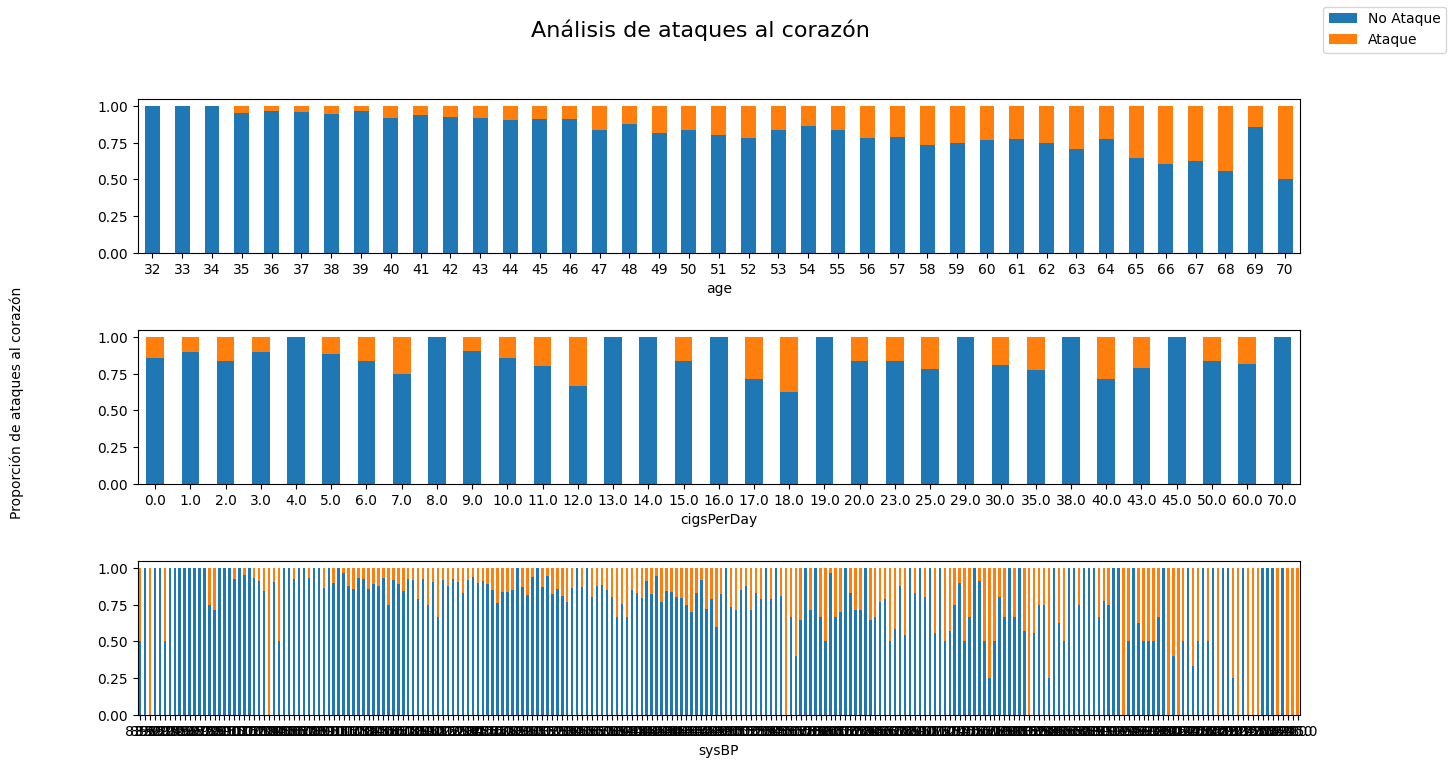

In [20]:
columnas=["age","cigsPerDay","sysBP"]
legends = []
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))

for col, ax in zip(columnas, axes.flatten()):
    table = pd.crosstab(data2[col], data2.TenYearCHD, normalize='index')
    table.plot(kind="bar", stacked=True, ax=ax, legend=None)

    ax.set(xlabel=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

fig.text(0.04, 0.5, 'Proporción de ataques al corazón', va='center', rotation='vertical')
fig.legend(legends, labels=["No Ataque", "Ataque"], loc='upper right')
fig.suptitle("Análisis de ataques al corazón", fontsize=16)
plt.subplots_adjust(wspace=0.7, hspace=0.5)
plt.show()

In [23]:
columnas=["male","age","education","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","sysBP"]

In [24]:
modelo_logistico = linear_model.LogisticRegression()
modelo_logistico.fit(data2[columnas],data[Y])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
modelo_logistico.score(data2[columnas],data[Y])

0.8532326569136385

In [26]:
Ranking["Coeficientes"]=pd.DataFrame(np.transpose(modelo_logistico.coef_))

In [27]:
Ranking=Ranking.rename(columns={ 0: 'Columnas' })
Ranking=Ranking.rename(columns={ 1: 'Ranking' })
Ranking

,Columnas,Ranking,Coeficientes
0,male,1,0.432224
1,age,1,0.063883
2,education,1,-0.013114
3,currentSmoker,1,0.176867
4,cigsPerDay,1,0.016908
5,BPMeds,1,0.286334
6,prevalentStroke,1,0.812617
7,prevalentHyp,1,0.266991
8,diabetes,1,0.826754
9,totChol,4,0.012819


In [28]:
display(Math(r'Predicción=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases},\ p=probabiliadad'))

<IPython.core.display.Math object>

Notemos que la predicción toma como con 0 a las probanilidades menores a 0.5 y caso contrario.

In [29]:
Probabilidad=pd.DataFrame(modelo_logistico.predict_proba(data2[columnas]))
Probabilidad["Predicción"]=pd.DataFrame(modelo_logistico.predict(data2[columnas]))
Probabiliadad=Probabilidad.rename(columns={1: 'Probabilidad', 0: 'Complemento'})
Probabiliadad

,Complemento,Probabilidad,Predicción
0,0.957310,0.042690,0
1,0.946682,0.053318,0
2,0.846218,0.153782,0
3,0.647648,0.352352,0
4,0.901027,0.098973,0
...,...,...,...
4233,0.725429,0.274571,0
4234,0.762015,0.237985,0
4235,0.890623,0.109377,0
4236,0.923463,0.076537,0


In [30]:
pd.crosstab(Probabilidad["Predicción"], columns="count")

col_0,count
Predicción,
0,4168
1,70


In [31]:
pd.crosstab(data2["TenYearCHD"], columns="count")

col_0,count
TenYearCHD,
0,3594
1,644


Ahora vamos a validadar nuestro modelo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


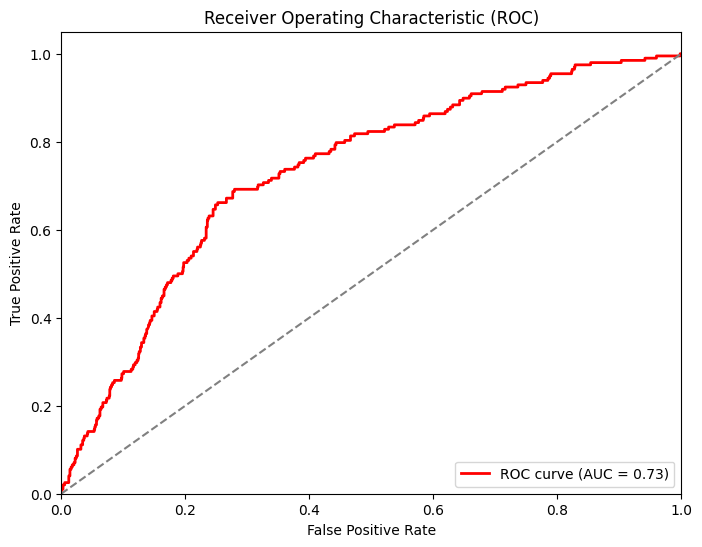

In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc

X=data2[columnas]
Y=data["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring="accuracy", cv=10)

# Calcular la media y la desviación estándar de los puntajes
mean_score = scores.mean()
std_score = scores.std()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [34]:
print(scores)
print("Media de puntajes:", mean_score)
print("Desviación estándar de puntajes:", std_score)

[0.84433962 0.85141509 0.84433962 0.85849057 0.84669811 0.84669811
 0.85141509 0.83726415 0.8463357  0.8463357 ]
Media de puntajes: 0.8473331772157545
Desviación estándar de puntajes: 0.005290708768635266
